# Preprocessing Practice

In this lab, you will load and pre-process weather data.

We begin, by loading in the raw dataset. The following code downloads and extracts the dataset for you as a CSV.

In [1]:
!wget https://github.com/Hvass-Labs/weather-denmark/raw/master/weather-denmark.tar.gz
!tar -xvzf weather-denmark.tar.gz

--2020-06-21 17:32:44--  https://github.com/Hvass-Labs/weather-denmark/raw/master/weather-denmark.tar.gz
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Hvass-Labs/weather-denmark/master/weather-denmark.tar.gz [following]
--2020-06-21 17:32:44--  https://raw.githubusercontent.com/Hvass-Labs/weather-denmark/master/weather-denmark.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35332031 (34M) [application/octet-stream]
Saving to: ‘weather-denmark.tar.gz’

weather-denmark.tar 100%[===================>]  33.69M   114MB/s    in 0.3s    

2020-06-21 17:32:45 (114 MB/s) - ‘weather-denmark.tar.gz’ sav

Now you take over! 

In [2]:
import pandas as pd

df = pd.read_csv('weather-denmark.csv')
df['Time'] = pd.to_datetime(df['DateTime'])

In [3]:
df = df.set_index(['City', 'Time'])
df.head()

DateTime  Temp  ...  WindSpeed  WindDir
City    Time                                            ...                    
Aalborg 1980-03-01 00:00:00  1980-03-01 00:00:00   5.0  ...       11.3    290.0
        1980-03-01 00:20:00  1980-03-01 00:20:00   4.0  ...        9.2    270.0
        1980-03-01 00:50:00  1980-03-01 00:50:00   4.0  ...        9.2    280.0
        1980-03-01 01:20:00  1980-03-01 01:20:00   4.0  ...        9.2    280.0
        1980-03-01 01:50:00  1980-03-01 01:50:00   4.0  ...        8.7    270.0

[5 rows x 5 columns]

In [4]:
df = df.drop(columns=['DateTime'])
df.head()

Temp  Pressure  WindSpeed  WindDir
City    Time                                                   
Aalborg 1980-03-01 00:00:00   5.0    1008.1       11.3    290.0
        1980-03-01 00:20:00   4.0       NaN        9.2    270.0
        1980-03-01 00:50:00   4.0       NaN        9.2    280.0
        1980-03-01 01:20:00   4.0       NaN        9.2    280.0
        1980-03-01 01:50:00   4.0       NaN        8.7    270.0

In [5]:
df.loc[('Aalborg', '1980-03-01 00:00:00') : ('Aalborg', '1980-03-01 04:00:00')]

Temp  Pressure  WindSpeed  WindDir
City    Time                                                   
Aalborg 1980-03-01 00:00:00   5.0    1008.1       11.3    290.0
        1980-03-01 00:20:00   4.0       NaN        9.2    270.0
        1980-03-01 00:50:00   4.0       NaN        9.2    280.0
        1980-03-01 01:20:00   4.0       NaN        9.2    280.0
        1980-03-01 01:50:00   4.0       NaN        8.7    270.0
        1980-03-01 02:20:00   4.0       NaN        9.2    280.0
        1980-03-01 03:00:00   3.0    1005.7       10.3    270.0
        1980-03-01 03:20:00   4.0       NaN       11.8    280.0
        1980-03-01 04:00:00   3.0       NaN       12.8    290.0

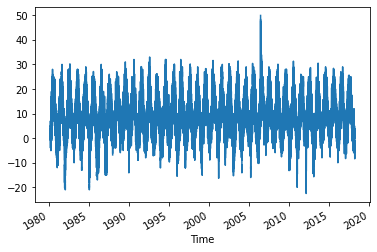

In [6]:
df.loc['Odense', 'Temp'].plot()

In [7]:
data = df.loc['Aalborg'].drop(columns=["Pressure"])
data.head(10)

,Temp,WindSpeed,WindDir
Time,,,
1980-03-01 00:00:00,5.0,11.3,290.0
1980-03-01 00:20:00,4.0,9.2,270.0
1980-03-01 00:50:00,4.0,9.2,280.0
1980-03-01 01:20:00,4.0,9.2,280.0
1980-03-01 01:50:00,4.0,8.7,270.0
1980-03-01 02:20:00,4.0,9.2,280.0
1980-03-01 03:00:00,3.0,10.3,270.0
1980-03-01 03:20:00,4.0,11.8,280.0
1980-03-01 04:00:00,3.0,12.8,290.0


In [27]:
data = data.dropna()
data.head()

,Temp,WindSpeed,WindDir
Time,,,
1980-03-01 00:00:00,5.0,11.3,290.0
1980-03-01 00:20:00,4.0,9.2,270.0
1980-03-01 00:50:00,4.0,9.2,280.0
1980-03-01 01:20:00,4.0,9.2,280.0
1980-03-01 01:50:00,4.0,8.7,270.0


In [28]:
# Resample the data to a useful frequency
resampled_data = data.resample('10T').interpolate()
resampled_data.head()

,Temp,WindSpeed,WindDir
Time,,,
1980-03-01 00:00:00,5.0,11.30,290.000000
1980-03-01 00:10:00,4.5,10.25,280.000000
1980-03-01 00:20:00,4.0,9.20,270.000000
1980-03-01 00:30:00,4.0,9.20,273.333333
1980-03-01 00:40:00,4.0,9.20,276.666667


In [29]:
# Benchmark 1: predict the current temperature as the temperature 1 hour in the future
resampled_data['Temp_1hr_label'] = resampled_data['Temp'].shift(-6)
resampled_data = resampled_data.dropna()
resampled_data.tail()

,Temp,WindSpeed,WindDir,Temp_1hr_label
Time,,,,
2018-03-01 22:10:00,-3.9,7.2,70.0,-4.16
2018-03-01 22:20:00,-4.0,7.2,70.0,-4.12
2018-03-01 22:30:00,-4.0,6.2,70.0,-4.08
2018-03-01 22:40:00,-4.0,6.7,70.0,-4.04
2018-03-01 22:50:00,-4.0,7.2,70.0,-4.00


In [30]:
((resampled_data['Temp'] - resampled_data['Temp_1hr_label']) ** 2).mean()

0.7321302519753635

In [ ]:
# do task 7 and 8 on own

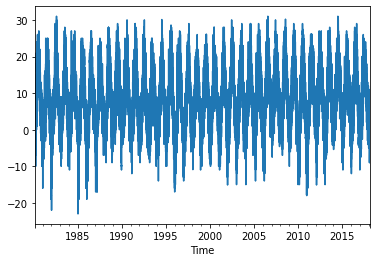

In [31]:
# RNN Prep
resampled_data['Temp'].plot()

In [32]:
train_data = resampled_data.loc['1980-03-01 00:00:00' : '2012-01-01 00:00:00']
train_data.shape

(1674433, 4)

In [37]:
import numpy as np

temps = train_data['Temp'].to_numpy()
windspeed = train_data['WindSpeed'].to_numpy()


history_to_keep = 240
num_train_examples = temps.shape[0] - history_to_keep
X_train = np.zeros((num_train_examples, history_to_keep, 2))

for i in range(num_train_examples):
  X_train[i, :, 0] = temps[i : i + 240] 
  X_train[i, :, 1] = windspeed[i : i + 240]

y_train = train_data['Temp_1hr_label'].to_numpy()

## Tasks

1. What is the data? 
2. Read and make useful plots of the data.
3. [Clean up the data #1] Check for and (if necessary) remove missing values.
4. [Clean up the data #2] Resample the data to a useful frequency (maybe hourly?).
5. Choose a prediction task. What prediction tasks are possible/reasonable?
6. [Baseline #1] Add a column to predict the previous timestep. What is the MSE?
6. [Baseline #2] Add a rolling average column to the data. What is the MSE?
6. [Baseline #3] Compute another baseline or pre-processing step of your choice (e.g., myou might consider smoothing, autoregressive model, etc.). 
6. [Prepare for RNN #1] Break your data into train, validation, and test. Why do we do this before processing for input to the RNN?
7. [Prepare for RNN #2] Recall that each input to an RNN is a *sequence*. Construct two Numpy arrays from your dataframe to be your train data and train labels.